In [1]:
library(terra)
library(sf)
library(tidyterra)
library(MultiscaleDTM)
library(randomForest)
library(caret)
library(vip)
library(rstac)


s_obj <- stac("https://planetarycomputer.microsoft.com/api/stac/v1")

terra 1.7.71

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.0; sf_use_s2() is TRUE


Attaching package: ‘tidyterra’


The following object is masked from ‘package:stats’:

    filter


Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




In [2]:
wa_eco <- vect("data/wa_l3_eco/wa_eco_l3.shp") |> 
    terra::project("EPSG:4326")
terra::ext(wa_eco)
wa_eco[1]

SpatExtent : -124.733170942523, -116.915582333433, 45.543541638577, 49.0024939377472 (xmin, xmax, ymin, ymax)

 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 1, 13  (geometries, attributes)
 extent      : -124.7332, -122.8495, 46.0966, 48.39173  (xmin, xmax, ymin, ymax)
 coord. ref. : lon/lat WGS 84 (EPSG:4326) 
 names       : US_L3CODE   US_L3NAME NA_L3CODE   NA_L3NAME NA_L2CODE
 type        :     <chr>       <chr>     <chr>       <chr>     <chr>
 values      :         1 Coast Range     7.1.8 Coast Range       7.1
       NA_L2NAME NA_L1CODE       NA_L1NAME STATE_NAME EPA_REGION (and 3 more)
           <chr>     <chr>           <chr>      <chr>      <int>             
 MARINE WEST CO~         7 MARINE WEST CO~ Washington         10             

In [47]:
it_obj <- s_obj |> 
    stac_search(collections = "nasadem",
                bbox = c(-124.733170942523, 45.543541638577,-116.915582333433,49.0024939377472)) |>
    get_request()

print(it_obj)

###STACItemCollection
- features (45 item(s)):
  - NASADEM_HGT_n49w125
  - NASADEM_HGT_n49w124
  - NASADEM_HGT_n49w123
  - NASADEM_HGT_n49w122
  - NASADEM_HGT_n49w121
  - NASADEM_HGT_n49w120
  - NASADEM_HGT_n49w119
  - NASADEM_HGT_n49w118
  - NASADEM_HGT_n49w117
  - NASADEM_HGT_n48w125
  - ... with 35 more feature(s).
- assets: elevation, rendered_preview, tilejson
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [4]:
length(it_obj$features)

[1] 250

In [26]:
wa_eco_dem1 <- rast(it_obj$features[[1]]$assets$elevation$href)
wa_eco_dem2 <- rast(it_obj$features[[2]]$assets$elevation$href)

wa_eco_dem_cmb <- terra::mosaic(wa_eco_dem1, wa_eco_dem2)

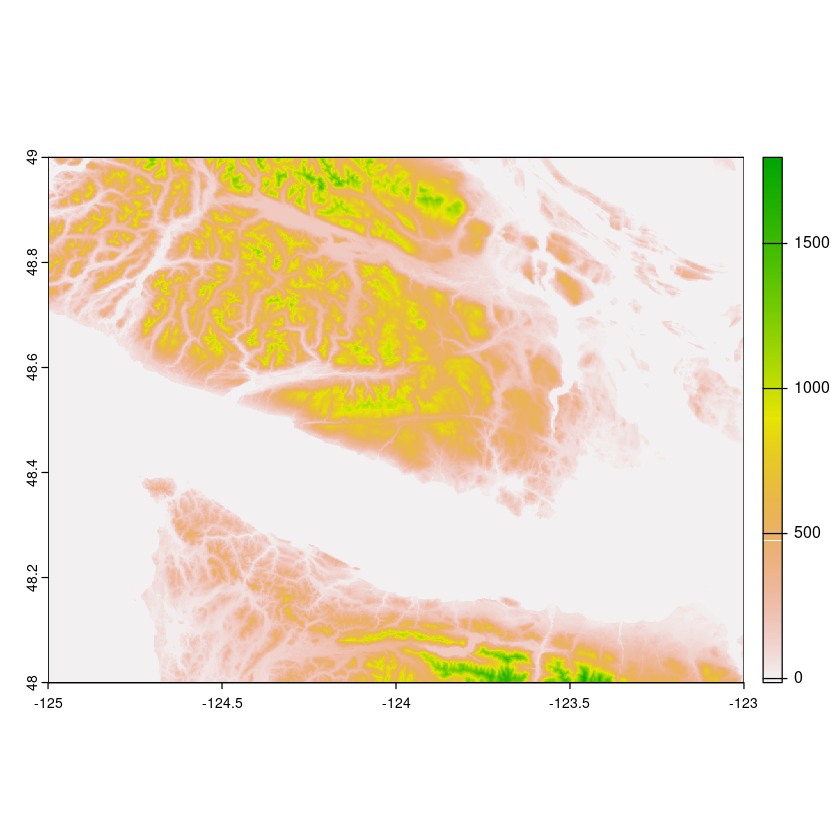

In [27]:
plot(wa_eco_dem_cmb)

In [ ]:
wa_list <- list()

for (i in 1:length(it_obj$features)){
    wa_list[i] <- rast(it_obj$features[[i]]$assets$elevation$href)
}

In [61]:
# sprc(wa_list)

class       : SpatRasterCollection 
length      : 45 
nrow        : 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, ... 
ncol        : 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601, ... 
nlyr        :    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1, ... 
extent      : -125.0001, -115.9999, 44.99986, 50.00014  (xmin, xmax, ymin, ymax)
crs (first) : lon/lat WGS 84 (EPSG:4326) 

In [ ]:
# wa_dem <- terra::mosaic(sprc(wa_list))


In [63]:
wa_dem

class       : SpatRaster 
dimensions  : 18001, 32401, 1  (nrow, ncol, nlyr)
resolution  : 0.0002777778, 0.0002777778  (x, y)
extent      : -125.0001, -115.9999, 44.99986, 50.00014  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : spat_cVoOBEi7ZowpaWz_89096.tif 
varname     : NASADEM_HGT_n49w125 
name        : NASADEM_HGT_n49w125 
min value   :                 -80 
max value   :                4374 

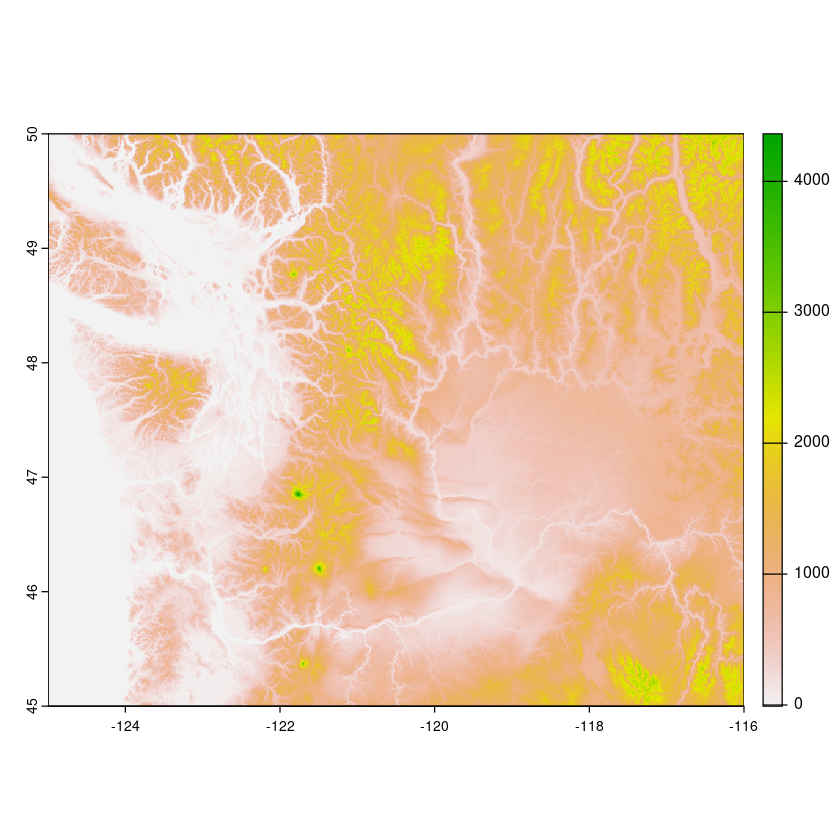

In [65]:
# writeRaster(wa_dem, filename = "data/wa_dem.tif")
# plot(wa_dem)

In [68]:
# wa_dem <- rast("data/wa_dem.tif") 

# wa_diss <- wa_eco |> terra::aggregate()

# wa_dem_diss <- wa_dem |> mask(wa_diss, filename = "data/wa_dem_diss.tif")

In [71]:
it_obj <- s_obj |> 
    stac_search(collections = "fws-nwi",
                bbox = c(-124.733170942523, 45.543541638577,-116.915582333433,49.0024939377472)) |>
    get_request()

print(it_obj)

###STACItemCollection
- features (3 item(s)):
  - WA
  - OR
  - ID
- assets: 
ID_Riparian, ID_Riparian_Project_Metadata, ID_Wetlands, ID_Wetlands_Historic_Map_Info, ID_Wetlands_Project_Metadata, Idaho, OR_Wetlands_East, OR_Wetlands_Historic_Map_Info, OR_Wetlands_Project_Metadata, OR_Wetlands_West, Oregon, WA_Wetlands, WA_Wetlands_Historic_Map_Info, WA_Wetlands_Project_Metadata, Washington, zip
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [87]:
temp <- tempfile()
download.file((it_obj$features[[1]]$assets$zip$href), temp)

Warning message in download.file((it_obj$features[[1]]$assets$zip$href), temp):
“cannot open URL 'https://landcoverdata.blob.core.windows.net/fws-nwi-onboarding/WA_shapefile_wetlands.zip': HTTP status was '404 Not Found'”


ERROR: Error in download.file((it_obj$features[[1]]$assets$zip$href), temp): cannot open URL 'https://landcoverdata.blob.core.windows.net/fws-nwi-onboarding/WA_shapefile_wetlands.zip'
